# LIBRERIE

In [40]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import itertools

# DATASET

In [2]:
dataset = pd.read_csv('C:/Users/damia/Documents/CODICI_PYTHON/snana/PROGETTO/DATASET/CosciaRios2012_DataBase.csv') #lettura del dataset
dataset.drop('Code', axis=1, inplace=True) #rimuoviamo la collona dove sono presenti i codici "provinciali"
dataset = dataset.groupby(['State','Year']).sum() #sommiamo le nostre istanze in base a Stato e Anno
dataset.to_csv('Mexican_Drug_Cartels_dta.csv') #salviamo il dataset

In [3]:
dataset = pd.read_csv('C:/Users/damia/Documents/CODICI_PYTHON/snana/PROGETTO/Mexican_Drug_Cartels_dta.csv')
#dividiamo il nostro datastet in due decadi 
dta_9000 = dataset[dataset.Year < 2000] #1990-1999
dta_0010 = dataset[dataset.Year >= 2000 ] #2000-2010

# FUNZIONI

In [43]:
def Edges_Generator(dataset, name_txt, Qcartelli, stateL=False, yearL=False, yearXstate=False, cartelL=False,
                    link_state_year=False):
    #permette la creazione di edges partendo dal dataset di partenza

    #esegue un check per vedere crearli su tutte le famiglie o su una in particolare
    if Qcartelli == 'ALL':
        cartelli = ['Beltran_Leyva', 'Beltran_Leyva_Family', 'Familia', 'Golfo', 
                    'Juarez', 'Sinaloa', 'Sinaloa_Family', 'Tijuana', 'Zetas', 'Otros']
    else:
        cartelli = []
        cartelli.append(Qcartelli)

    res_list = []
    
    for state in dataset.State.unique(): #creiuamo un subset per ogni stato in maniera ricorsiva
        sub1 = dataset[dataset.State == state]

        for year in sub1.Year: #creiuamo un subset per ogni anno in maniera ricorsiva
            sub2 = sub1[sub1.Year == year]
            
            for single in cartelli:
                value = sub2[single].iloc[0] #troviamo il numero di volte che il cartello è apparso
                list = []

                if value > 0 : #eseguiamo un controllo per sapere se creare o no il collegamento
                    #in base alle impostazioni decise prendiamo PARTENZA(A), ARRIVO(B) e WEIGHT(W)
                    if yearXstate == True:
                        year_ = str(year)
                        _state = str(state)
                        year_state = str(year_ + '_' + _state)

                    if stateL == True:
                        list.append(state)
                    
                    if yearL == True:
                        list.append(year)
                    elif yearXstate == True:
                        list.append(year_state)
                    
                    if Qcartelli == 'ALL':
                        if cartelL == True:
                            list.append(single)
                    else:
                        if cartelL == True:
                            list.append(Qcartelli)
                    
                    if link_state_year == True:
                        list.append(1)
                    else:
                        list.append(value)
                    res_list.append(list)

    #creiamo il file.txt con il nome deciso nelle impostazioni                    
    name_file = str(name_txt + ".txt")
    file = open(name_file, "w+")

    file.write('A'+',')
    file.write('B'+',')
    file.write('Weight'+'\n')

    for list in res_list:
        time = 0
        for element in list:
            time = time + 1
            e = str(element)
            file.write(e)
            if time < 3:
                file.write(',')
            else:
                file.write('\n')

    file.close()

    return(file)

#----------------------------------------------------------------------------------------#

def Edges_Generator_for_Cartel(name_cartel, cartel_sigla, years_9000=False, years_0010=False):

    if years_9000 == True: #svolgo operazioni per gli anni 1990 - 1999
        #assegno i nomi ai file tramite una concatenazione di stringhe
        name_txt_9000_yXc = 'year_'+str(name_cartel)+'_'+str(cartel_sigla)+'9000'
        name_txt_9000_sXy = 'state_year_'+str(name_cartel)+'_'+str(cartel_sigla)+'9000'
        name_csv_9000 = str(name_cartel)+'_'+'9000'+'.csv'

        #utilizzo la funzione creata in precesenza per generare gli edges
        Edges_Generator(dta_9000,name_txt_9000_yXc, name_cartel, yearL=True,cartelL=True)
        Edges_Generator(dta_9000,name_txt_9000_sXy, name_cartel, stateL=True, yearL=True,link_state_year=True)

        name_txt_9000_yXc = name_txt_9000_yXc + '.txt'
        name_txt_9000_sXy = name_txt_9000_sXy + '.txt'

        #creo i percorsi delle per leggeere i file.txt sopra creati
        percorso_cartella = 'C:/Users/damia/Documents/CODICI_PYTHON/snana/PROGETTO/'
        percorso_1 = str(percorso_cartella) + str(name_txt_9000_sXy)
        percorso_2 = str(percorso_cartella) + str(name_txt_9000_yXc)
        percorso_3 = str(percorso_cartella) + str(name_csv_9000)

        df_1 = pd.read_csv(str(percorso_1))
        df_2 = pd.read_csv(str(percorso_2))
        df_2 = df_2.groupby(['A','B']).sum() #effettuo una somma in base ad anno e cartello
        df_2.to_csv(name_csv_9000) 
        df_2 = pd.read_csv(percorso_3)
        df = pd.concat([df_1,df_2],ignore_index=True, sort=False) #unisco le due liste di edges
    
    elif years_0010 == True: #svolgo le stesse operazioni per gli anni fra 2000 e 2010
        name_txt_0010_yXc = 'year_'+str(name_cartel)+'_'+str(cartel_sigla)+'0010'
        name_txt_0010_sXy = 'state_year_'+str(name_cartel)+'_'+str(cartel_sigla)+'0010'
        name_csv_0010 = str(name_cartel)+'_'+'0010'+'.csv'

        Edges_Generator(dta_0010,name_txt_0010_yXc, name_cartel, yearL=True,cartelL=True)
        Edges_Generator(dta_0010,name_txt_0010_sXy, name_cartel, stateL=True, yearL=True,link_state_year=True)

        name_txt_0010_yXc = name_txt_0010_yXc + '.txt'
        name_txt_0010_sXy = name_txt_0010_sXy + '.txt'

        percorso_cartella = 'C:/Users/damia/Documents/CODICI_PYTHON/snana/PROGETTO/'
        percorso_1 = str(percorso_cartella) + str(name_txt_0010_sXy)
        percorso_2 = str(percorso_cartella) + str(name_txt_0010_yXc)
        percorso_3 = str(percorso_cartella) + str(name_csv_0010)

        df_1 = pd.read_csv(str(percorso_1))
        df_2 = pd.read_csv(str(percorso_2))
        df_2 = df_2.groupby(['A','B']).sum()
        df_2.to_csv(name_csv_0010)
        df_2 = pd.read_csv(percorso_3)
        df = pd.concat([df_1,df_2],ignore_index=True, sort=False) 

    return(df)

#----------------------------------------------------------------------------------------#

def Edges_Only_Cartel_Network_Start(dataset,name_txt):
    
    cartelli = ['Beltran_Leyva', 'Beltran_Leyva_Family', 'Familia', 'Golfo', 
                'Juarez', 'Sinaloa', 'Sinaloa_Family', 'Tijuana', 'Zetas', 'Otros']

    final_list = []
    for state in dataset.State.unique():
        sub1 = dataset[dataset.State == state]

        for year in sub1.Year:
            sub2 = sub1[sub1.Year == year]
            
            for single in cartelli:
                value = sub2[single].iloc[0]
                list = []
                if value > 0 :
                    list.append(state)
                    list.append(year)
                    list.append(single)
                    list.append(value)
                    final_list.append(list)
                    
    name_file = str(name_txt + ".txt")
    file = open(name_file, "w+")

    file.write('A'+',')
    file.write('Bridge'+',')
    file.write('B'+',')
    file.write('Weight'+'\n')

    for list in final_list:
        time = 0
        for element in list:
            time = time + 1
            e = str(element)
            file.write(e)
            if time < 4:
                file.write(',')
            else:
                file.write('\n')

    file.close() 

    return(file)

#----------------------------------------------------------------------------------------#

def Edges_Only_Cartel_Network_Final(dataset, name_txt, name_csv, year_selected):

    Edges_Only_Cartel_Network_Start(dataset,name_txt)

    name_file_txt = name_txt+'.txt'
    name_file_csv = name_csv+'.csv'
    percorso_cartella = 'C:/Users/damia/Documents/CODICI_PYTHON/snana/PROGETTO/'
    percorso1 = percorso_cartella + name_file_txt
    percorso2 = percorso_cartella + name_file_csv

    data =  pd.read_csv(percorso1)

    data = data[data.Bridge == year_selected]

    data_AB = data[['A','B','Weight']]
    data_AB = data_AB.groupby(['A','B']).sum()

    data_AB.to_csv(name_file_csv)

    df = pd.read_csv(percorso2)

    edges_list = []

    for state in df.A.unique():
        sub = df[df.A == state]
        
        if len(sub) > 1:
            list_cartels = []
            for cartel in sub.B:
                list_cartels.append(cartel)

            for v in itertools.combinations(list_cartels, 2):
                edges_list.append(v)
                
                
    new_df = pd.DataFrame(columns=['A','B'])
    new_df[['A','B']]=edges_list

    new_cols = ['A','B']
    new_df = new_df.reindex(new_df.columns.union(new_cols), axis=1) 

    return(new_df) 

# NETWORK VISUALIZATION

## GENERAL

In [5]:
Edges_Generator(dta_9000,'G_yearXstate_cartel_9000','ALL',yearXstate=True,cartelL=True) #G_yearXstate_cartel_9000
Edges_Generator(dta_9000,'G_state_yearXstate_9000','ALL',stateL=True, yearXstate=True) #G_state_yearXstate_9000
df_1 = pd.read_csv('C:/Users/damia/Documents/CODICI_PYTHON/snana/PROGETTO/G_state_yearXstate_9000.txt')
df_2 = pd.read_csv('C:/Users/damia/Documents/CODICI_PYTHON/snana/PROGETTO/G_yearXstate_cartel_9000.txt')
df_9000 = pd.concat([df_1,df_2],ignore_index=True, sort=False)


Edges_Generator(dta_0010,'G_yearXstate_cartel_0010','ALL',yearXstate=True,cartelL=True) #G_yearXstate_cartel_0010
Edges_Generator(dta_0010,'G_state_yearXstate_0010','ALL',stateL=True, yearXstate=True) #G_state_yearXstate_0010
df_1 = pd.read_csv('C:/Users/damia/Documents/CODICI_PYTHON/snana/PROGETTO/G_state_yearXstate_0010.txt')
df_2 = pd.read_csv('C:/Users/damia/Documents/CODICI_PYTHON/snana/PROGETTO/G_yearXstate_cartel_0010.txt')
df_0010 = pd.concat([df_1,df_2],ignore_index=True, sort=False)

## PER FAMIGLIA

In [6]:
#1990-1999: in alcuni non sono presenti dati quindi decidiamo di non eseguire la creazione 
#df_BL9000 = Edges_Generator_for_Cartel('Beltran_Leyva','BL',years_9000=True)
#df_BLF9000 = Edges_Generator_for_Cartel('Beltran_Leyva_Family','BLF',years_9000=True)
#df_F9000 = Edges_Generator_for_Cartel('Familia','F',years_9000=True)
df_G9000 = Edges_Generator_for_Cartel('Golfo','G',years_9000=True)
df_J9000 = Edges_Generator_for_Cartel('Juarez','J',years_9000=True)
df_S9000 = Edges_Generator_for_Cartel('Sinaloa','S',years_9000=True)
#df_SF9000 = Edges_Generator_for_Cartel('Sinaloa_Family','SF',years_9000=True)
df_T9000 = Edges_Generator_for_Cartel('Tijuana','T',years_9000=True)
df_Z9000 = Edges_Generator_for_Cartel('Zetas','Z',years_9000=True)
#df_O9000 = Edges_Generator_for_Cartel('Otros','O',years_9000=True)

#2000-2010
df_BL0010 = Edges_Generator_for_Cartel('Beltran_Leyva','BL',years_0010=True)
df_BLF0010 = Edges_Generator_for_Cartel('Beltran_Leyva_Family','BLF',years_0010=True)
df_F0010 = Edges_Generator_for_Cartel('Familia','F',years_0010=True)
df_G0010 = Edges_Generator_for_Cartel('Golfo','G',years_0010=True)
df_J0010 = Edges_Generator_for_Cartel('Juarez','J',years_0010=True)
df_S0010 = Edges_Generator_for_Cartel('Sinaloa','S',years_0010=True)
df_SF0010 = Edges_Generator_for_Cartel('Sinaloa_Family','SF',years_0010=True)
df_T0010 = Edges_Generator_for_Cartel('Tijuana','T',years_0010=True)
df_Z0010 = Edges_Generator_for_Cartel('Zetas','Z',years_0010=True)
df_O0010 = Edges_Generator_for_Cartel('Otros','O',years_0010=True)

# NETWORK FAMIGLIE

In [44]:
prova= Edges_Only_Cartel_Network_Final(dta_9000,'network_cartels_1993','network_cartels_1993',1993)
prova

ValueError: cannot copy sequence with size 8 to array axis with dimension 0

## Rete famiglia zetas anni 90'

In [28]:
df_1 = pd.read_csv('state_year_Zetas_Z9000.txt')
x = df_Z9000.values.tolist()

2 1992 1
2 1993 1
2 1994 1
2 1999 1
7 1998 1
9 1994 1
11 1994 1
15 1994 1
15 1996 1
15 1999 1
17 1999 1
20 1998 1
21 1998 1
22 1994 1
25 1992 1
25 1993 1
25 1994 1
25 1999 1
26 1993 1
26 1994 1
26 1999 1
27 1998 1
1992 Zetas 2
1993 Zetas 3
1994 Zetas 10
1996 Zetas 1
1998 Zetas 5
1999 Zetas 5


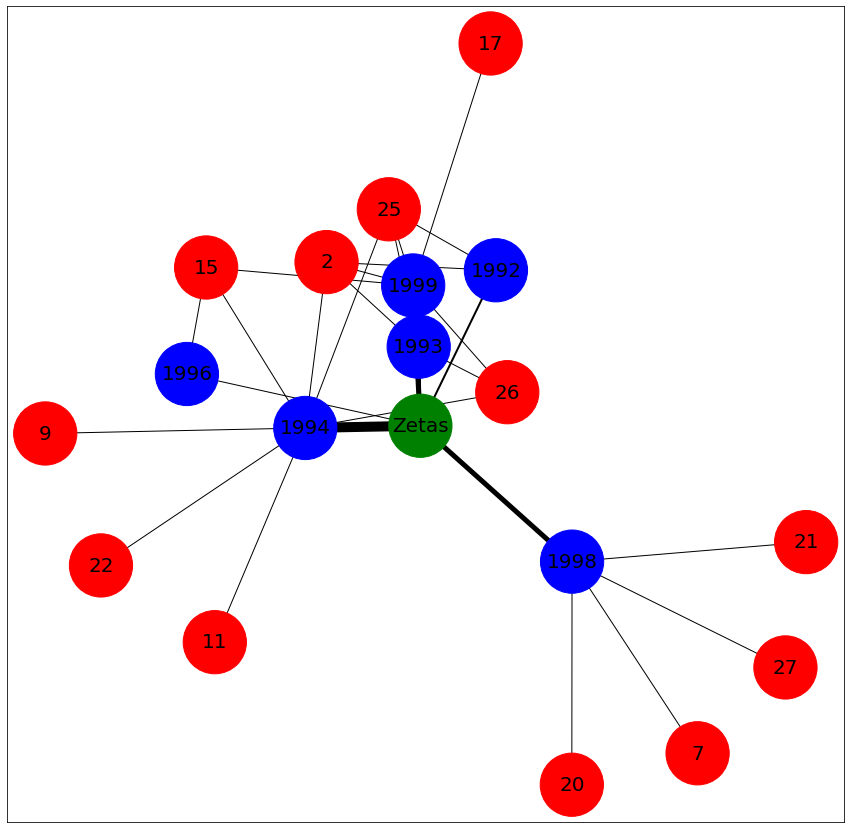

In [29]:
G = nx.Graph()

for i in df_1.A.unique():
    name = str(i)
    G.add_node(name, color = 'red')

for i in df_1.B.unique():
    name = str(i)
    G.add_node(name, color = 'blue')

G.add_node('Zetas', color = 'green')


for i in range(len(x)):
    edge = x[i]
    add = -1

    for o in range(len(edge)):
        add = add + 1
        
        if add == 0:
            A = edge[add]
            
        elif add == 1:
            B = edge[add]
            
        else:
            W = edge[add]
    G.add_edge(str(A), str(B) ,weight=int(W))
    print(A,B,W)

all_weights=[]
for (node1,node2,data) in G.edges(data=True):
        all_weights.append(data['weight']) #we'll use this when determining edge thickness

nodes_color=[]
for (node1,data) in G.nodes(data=True):
        nodes_color.append(data['color']) #we'll use this when determining edge thickness


unique_weights = list(set(all_weights))

pos = nx.spring_layout(G)

for weight in unique_weights:
        #4 d. Form a filtered list with just the weight you want to draw
        weighted_edges = [(node1,node2) for (node1,node2,edge_attr) in G.edges(data=True) if edge_attr['weight']==weight]
        width = weight
        nx.draw_networkx_edges(G,pos,edgelist=weighted_edges,width=width)


nx.draw_networkx_nodes(G,pos,node_color=nodes_color, node_size=4000)

nx.draw_networkx_labels(G,pos,font_size=20, font_family="sans-serif")

#plt.axis('off')
#plt.rcParams["figure.figsize"] = (15,15)
#plt.show()

pass

### Metriche rete Zetas anni 90'

In [18]:
#CALCOLO DEI DEGREE DEI NODI E DELL'AVERAGE DEGREE
## accesso a tutti i node degree
print('Calcolo il degree di ogni singolo nodo della rete:')
for node,degree in G.degree():
    print('il nodo',node,'ha degree:',degree)
    
somma_degree = sum(dict(G.degree()).values())
print('\nLa somma dei node degree è:',somma_degree)
print('\nL\'average degree di questa network è:',somma_degree/(len(G)))

Calcolo il degree di ogni singolo nodo della rete:
il nodo 2 ha degree: 4
il nodo 7 ha degree: 1
il nodo 9 ha degree: 1
il nodo 11 ha degree: 1
il nodo 15 ha degree: 3
il nodo 17 ha degree: 1
il nodo 20 ha degree: 1
il nodo 21 ha degree: 1
il nodo 22 ha degree: 1
il nodo 25 ha degree: 4
il nodo 26 ha degree: 3
il nodo 27 ha degree: 1
il nodo 1992 ha degree: 3
il nodo 1993 ha degree: 4
il nodo 1994 ha degree: 8
il nodo 1999 ha degree: 6
il nodo 1998 ha degree: 5
il nodo 1996 ha degree: 2
il nodo Zetas ha degree: 6

La somma dei node degree è: 56

L'average degree di questa network è: 2.9473684210526314


In [19]:
#DENSITA'
print('Densità della rete equivale a:',nx.density(G))

Densità della rete equivale a: 0.16374269005847952


In [20]:
#MATRICE DI ADIACENZA PESATA
print('MATRICE DI ADIACENZA PESATA') 
m = nx.to_pandas_adjacency(G, nodelist=sorted(G.nodes), dtype=int)
m
#m.to_excel('undirected.xlsx') # PER SALVARLA 

MATRICE DI ADIACENZA PESATA


,11,15,17,1992,1993,1994,1996,1998,1999,2,20,21,22,25,26,27,7,9,Zetas
11,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
15,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0
17,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1992,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,2
1993,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,3
1994,1,1,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,1,10
1996,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1998,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,5
1999,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,5
2,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0


In [25]:
def net_family(name_file,dataset,S):
    
    percorso_cartella = 'C:/Users/damia/Documents/CODICI_PYTHON/snana/PROGETTO/'
    percorso_1 = percorso_cartella + name_file + '.txt'

    df_2 = pd.read_csv(percorso_1)
    z = dataset.values.tolist()

    for i in df_2.A.unique():
        name = str(i)
        S.add_node(name, color = 'red')

    for i in df_2.B.unique():
        name = str(i)
        S.add_node(name, color = 'blue')

    S.add_node('Zetas', color = 'green')

    for i in range(len(z)):
        edge = z[i]
        add = -1

        for o in range(len(edge)):
            add = add + 1
            
            if add == 0:
                A = edge[add]
                
            elif add == 1:
                B = edge[add]
                
            else:
                W = edge[add]
        S.add_edge(str(A), str(B) ,weight=int(W))
        print(A,B,W)

    all_weights=[]
    for (node1,node2,data) in S.edges(data=True):
            all_weights.append(data['weight']) #we'll use this when determining edge thickness

    nodes_color=[]
    for (node1,data) in S.nodes(data=True):
            nodes_color.append(data['color']) #we'll use this when determining edge thickness


    unique_weights = list(set(all_weights))

    pos = nx.spring_layout(S)

    for weight in unique_weights:
            #4 d. Form a filtered list with just the weight you want to draw
            weighted_edges = [(node1,node2) for (node1,node2,edge_attr) in S.edges(data=True) if edge_attr['weight']==weight]
            width = weight
            nx.draw_networkx_edges(S,pos,edgelist=weighted_edges,width=width)


    nx.draw_networkx_nodes(S,pos,node_color=nodes_color, node_size=4000)

    nx.draw_networkx_labels(S,pos,font_size=20, font_family="sans-serif")

In [30]:
S = nx.graph()

TypeError: 'module' object is not callable

In [ ]:

net_family('state_year_Zetas_Z9000',df_S9000,S)


## RETE FAMIGLIA SINALOA ANNI 90' 

In [34]:
df_1 = pd.read_csv('state_year_Sinaloa_S9000.txt')
x = df_S9000.values.tolist()

1 1997 1
2 1993 1
2 1995 1
2 1996 1
2 1997 1
2 1998 1
7 1993 1
7 1998 1
8 1993 1
8 1996 1
8 1997 1
11 1993 1
14 1993 1
14 1995 1
14 1996 1
14 1997 1
14 1998 1
14 1999 1
15 1997 1
15 1998 1
18 1995 1
21 1993 1
25 1991 1
25 1993 1
25 1994 1
25 1995 1
25 1997 1
25 1998 1
26 1991 1
26 1995 1
26 1998 1
28 1993 1
28 1997 1
30 1993 1
30 1999 1
1991 Sinaloa 3
1993 Sinaloa 12
1994 Sinaloa 2
1995 Sinaloa 7
1996 Sinaloa 3
1997 Sinaloa 10
1998 Sinaloa 10
1999 Sinaloa 2


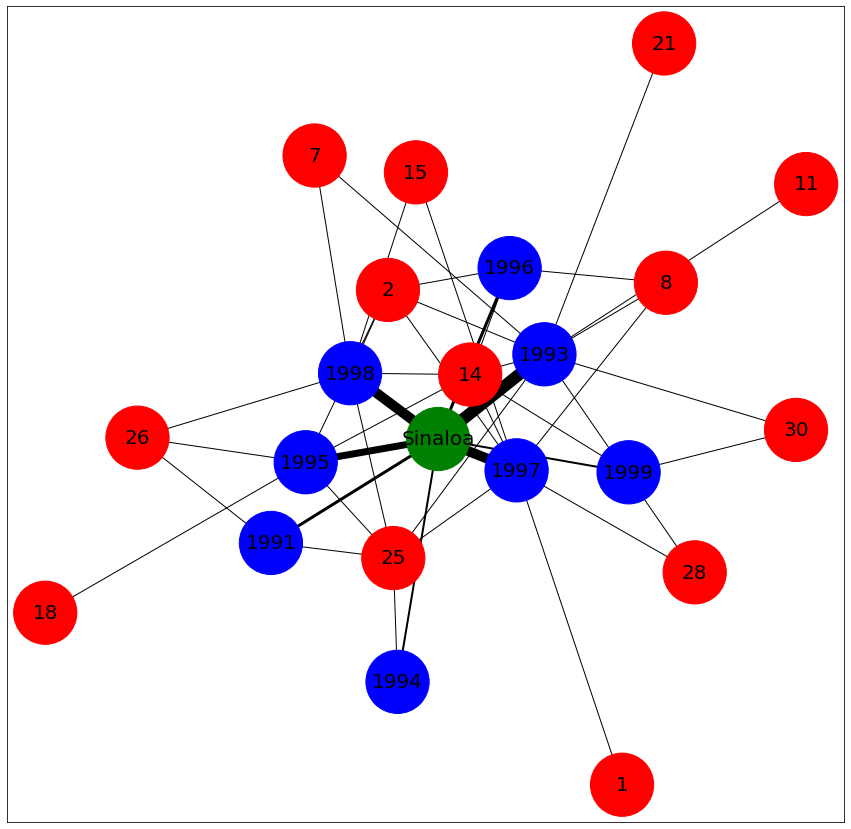

In [35]:
G = nx.Graph()

for i in df_1.A.unique():
    name = str(i)
    G.add_node(name, color = 'red')

for i in df_1.B.unique():
    name = str(i)
    G.add_node(name, color = 'blue')

G.add_node('Sinaloa', color = 'green')


for i in range(len(x)):
    edge = x[i]
    add = -1

    for o in range(len(edge)):
        add = add + 1
        
        if add == 0:
            A = edge[add]
            
        elif add == 1:
            B = edge[add]
            
        else:
            W = edge[add]
    G.add_edge(str(A), str(B) ,weight=int(W))
    print(A,B,W)

all_weights=[]
for (node1,node2,data) in G.edges(data=True):
        all_weights.append(data['weight']) #we'll use this when determining edge thickness

nodes_color=[]
for (node1,data) in G.nodes(data=True):
        nodes_color.append(data['color']) #we'll use this when determining edge thickness


unique_weights = list(set(all_weights))

pos = nx.spring_layout(G)

for weight in unique_weights:
        #4 d. Form a filtered list with just the weight you want to draw
        weighted_edges = [(node1,node2) for (node1,node2,edge_attr) in G.edges(data=True) if edge_attr['weight']==weight]
        width = weight
        nx.draw_networkx_edges(G,pos,edgelist=weighted_edges,width=width)


nx.draw_networkx_nodes(G,pos,node_color=nodes_color, node_size=4000)

nx.draw_networkx_labels(G,pos,font_size=20, font_family="sans-serif")

#plt.axis('off')
#plt.rcParams["figure.figsize"] = (15,15)
#plt.show()

pass

### Metriche Rete Sinaloa anni 90' 

In [36]:
#CALCOLO DEI DEGREE DEI NODI E DELL'AVERAGE DEGREE
## accesso a tutti i node degree
print('Calcolo il degree di ogni singolo nodo della rete:')
for node,degree in G.degree():
    print('il nodo',node,'ha degree:',degree)
    
somma_degree = sum(dict(G.degree()).values())
print('\nLa somma dei node degree è:',somma_degree)
print('\nL\'average degree di questa network è:',somma_degree/(len(G)))

Calcolo il degree di ogni singolo nodo della rete:
il nodo 1 ha degree: 1
il nodo 2 ha degree: 5
il nodo 7 ha degree: 2
il nodo 8 ha degree: 3
il nodo 11 ha degree: 1
il nodo 14 ha degree: 6
il nodo 15 ha degree: 2
il nodo 18 ha degree: 1
il nodo 21 ha degree: 1
il nodo 25 ha degree: 6
il nodo 26 ha degree: 3
il nodo 28 ha degree: 2
il nodo 30 ha degree: 2
il nodo 1997 ha degree: 8
il nodo 1993 ha degree: 10
il nodo 1995 ha degree: 6
il nodo 1996 ha degree: 4
il nodo 1998 ha degree: 7
il nodo 1999 ha degree: 3
il nodo 1991 ha degree: 3
il nodo 1994 ha degree: 2
il nodo Sinaloa ha degree: 8

La somma dei node degree è: 86

L'average degree di questa network è: 3.909090909090909


In [37]:
#DENSITA'
print('Densità della rete equivale a:',nx.density(G))

Densità della rete equivale a: 0.18614718614718614


In [38]:
#MATRICE DI ADIACENZA PESATA
print('MATRICE DI ADIACENZA PESATA') 
m = nx.to_pandas_adjacency(G, nodelist=sorted(G.nodes), dtype=int)
m
#m.to_excel('undirected.xlsx') # PER SALVARLA 

MATRICE DI ADIACENZA PESATA


,1,11,14,15,18,1991,1993,1994,1995,1996,...,1999,2,21,25,26,28,30,7,8,Sinaloa
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,1,0,1,1,...,1,0,0,0,0,0,0,0,0,0
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1991,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,3
1993,0,1,1,0,0,0,0,0,0,0,...,0,1,1,1,0,1,1,1,1,12
1994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,2
1995,0,0,1,0,1,0,0,0,0,0,...,0,1,0,1,1,0,0,0,0,7
1996,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,3
